# Rihanna or Mariah?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A **single** is typically one song, but sometimes can be two songs which are on one "single" record.

In this we will: 

1. Scrape Wikipedia to obtain infprmation about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data. Along the way you will learn how to save data in json files to avoid repeated scraping. 
2. Scrape Wikipedia to obtain information on these singers. You will have to scrape the web pages, this time using a cache to guard against network timeouts (or your laptop going to sleep). You will again clean the data, and save it to a json file.
3. Use pandas to represent these two datasets and merge them.
4. Use the individual and merged datasets to visualize the performance of the artists and their songs. We have kept the amount of analysis limited here for reasons of time; but you might enjoy exploring music genres and other aspects of the music business you can find on these wikipedia pages at your own leisure.

As usual, first we import the necessary libraries.  In particular, we use [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) to give us a nicer default color palette, with our plots being of large (`poster`) size and with a white-grid background. 

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## Scraping Wikipedia for Billboard Top 100.

 you will scrape Wikipedia for the Billboard's top 100 singles.

### Scraping Wikipedia for Billboard singles

We'll be using  [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/), and suggest that you use Python's built in `requests` library to fetch the web page.

####  Parsing the Billboard Wikipedia page for 1970

Obtain the web page at http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970 using a HTTP GET request. From this web page we'll extract the top 100 singles and their rankings. Create a list of dictionaries, 100 of them to be precise, with entries like 

`{'url': '/wiki/Sugarloaf_(band)', 'ranking': 30, 'band_singer': 'Sugarloaf', 'title': 'Green-Eyed Lady'}`. 

If you look at that web page, you'll see a link for every song, from which you can get the `url` of the singer or band. We will use these links later to scrape information about the singer or band. From the listing we can also get the band or singer name `band_singer`, and `title` of the song.


You should get something similar to this (where songs is the aforementioned list):

```
songs[2:4]
```

```
[{'band_singer': 'The Guess Who',
  'ranking': 3,
  'title': '"American Woman"',
  'url': '/wiki/The_Guess_Who'},
 {'band_singer': 'B.J. Thomas',
  'ranking': 4,
  'title': '"Raindrops Keep Fallin\' on My Head"',
  'url': '/wiki/B.J._Thomas'}]
```

#### Generalize the previous: scrape Wikipedia from 1992 to 2014

By visiting the urls similar to the ones for 1970, we can obtain the billboard top 100 for the years 1992 to 2014.  Download these using Python's `requests` module and store the text from those requests in a dictionary called `yearstext`. This dictionary ought to have as its keys the years (as integers from 1992 to 2014),

You ought to sleep a second (look up `time.sleep` in Python) at the very least in-between fetching each web page: you do not want Wikipedia to think you are a marauding bot attempting to mount a denial-of-service attack.

In [4]:
import requests 
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
tables = soup.find_all("table",attrs = {"class":"wikitable"})

In [3]:
from IPython.core.display import display, HTML
display(HTML(tables[0].prettify()))

№,Title,Artist(s)
1,""" Bridge over Troubled Water """,Simon & Garfunkel
2,""" (They Long to Be) Close to You """,The Carpenters
3,""" American Woman """,The Guess Who
4,""" Raindrops Keep Fallin' on My Head """,B.J. Thomas
5,""" War """,Edwin Starr
6,""" Ain't No Mountain High Enough """,Diana Ross
7,""" I'll Be There """,The Jackson 5
8,""" Get Ready """,Rare Earth
9,""" Let It Be """,The Beatles
10,""" Band of Gold """,Freda Payne


In [4]:
#rows = tables[0].find_all("tr")[1:]
#air = [(0,'Title'),(1,'Airtist')]
#for row in rows:
    #print len(row.find_all('td'))
#titles,artists = rows[94].find_all('td')
#print rows[94].find('th').text
#for title in titles.find_all('a',href = True):
    #print title['href']
    #print title.text
#for artist in artists.find_all('a',href = True):
    #print artist['href']
    #print artist.text
#print titles.text

In [5]:
def parse_year(rows_test):
    top_year = []
    for row in rows_test:
        top_sing = {}
        titles,artists = row.find_all('td')
        top_sing['ranking'] = row.find('th').text
        tit=[]
        tit_url =[]
        if titles.find('a') != None:
            for title in titles.find_all('a',href = True):
                tit.append(title.text)
                try:
                    tit_url.append(title['href'])
                except:
                    tit_url.append(np.nan)
        else:
            tit.append(titles.text)
            tit_url.append(np.nan)     
        ast=[]
        ast_url=[]
        for artist in artists.find_all('a',href = True):
            ast.append(artist.text)
            try:
                ast_url.append(artist['href'])
            except:
                ast_url.append(np.nan)
        top_sing['song'] = tit
        top_sing['songurl'] = tit_url
        top_sing['band_singer'] = ast
        top_sing['url'] = ast_url
        top_year.append(top_sing)
    return top_year

In [ ]:
# DONT RERUN THIS SHELL RUN ONETIME AND SAVE IN LOCAL FILE AS BELOW
import time
final = {}
for y in range(1992,2015):
    surl = "https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_{}".format(y)
    req = requests.get(surl)
    soup_html = BeautifulSoup(req.text, 'html.parser')
    tables_wiki = soup_html.find_all("table",attrs = {"class":"wikitable"})
    rows_year = tables_wiki[0].find_all("tr")[1:]
    singer_det = parse_year(rows_year)
    final[y] = singer_det
    time.sleep(10)
    print y

In [10]:
final

{1992: [{'band_singer': [u'Boyz II Men'],
   'ranking': u'1',
   'song': [u'End of the Road'],
   'songurl': [u'/wiki/End_of_the_Road'],
   'url': [u'/wiki/Boyz_II_Men']},
  {'band_singer': [u'Sir Mix-a-Lot'],
   'ranking': u'2',
   'song': [u'Baby Got Back'],
   'songurl': [u'/wiki/Baby_Got_Back'],
   'url': [u'/wiki/Sir_Mix-a-Lot']},
  {'band_singer': [u'Kris Kross'],
   'ranking': u'3',
   'song': [u'Jump'],
   'songurl': [u'/wiki/Jump'],
   'url': [u'/wiki/Kris_Kross']},
  {'band_singer': [u'Vanessa Williams'],
   'ranking': u'4',
   'song': [u'Save the Best for Last'],
   'songurl': [u'/wiki/Save_the_Best_for_Last'],
   'url': [u'/wiki/Vanessa_L._Williams']},
  {'band_singer': [u'TLC'],
   'ranking': u'5',
   'song': [u'Baby-Baby-Baby'],
   'songurl': [u'/wiki/Baby-Baby-Baby'],
   'url': [u'/wiki/TLC_(band)']},
  {'band_singer': [u'Eric Clapton'],
   'ranking': u'6',
   'song': [u'Tears in Heaven'],
   'songurl': [u'/wiki/Tears_in_Heaven'],
   'url': [u'/wiki/Eric_Clapton']},
  {'

#### Helpful notes

Notice that some singles might have multiple songs:

```
{'band_singer': ['Jewel'],
  'ranking': 2,
  'song': ['Foolish Games', 'You Were Meant for Me'],
  'songurl': ['/wiki/Foolish_Games',
   '/wiki/You_Were_Meant_for_Me_(Jewel_song)'],
  'titletext': '" Foolish Games " / " You Were Meant for Me "',
  'url': ['/wiki/Jewel_(singer)']}
```

And some singles don't have a song URL:

```
{'band_singer': [u'Nu Flavor'],
  'ranking': 91,
  'song': [u'Heaven'],
  'songurl': [None],
  'titletext': u'"Heaven"',
  'url': [u'/wiki/Nu_Flavor']}
```

Thus there are some issues this function must handle:

1. There can be more than one  `band_singer` as can be seen above (sometimes with a comma, sometimes with "featuring" in between). The best way to parse these is to look for the urls.
2. There can be two songs in a single, because of the way the industry works: there are two-sided singles. See https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1997 for an example. You can find other examples in 1998 and 1999.
3. The `titletext` is the contents of the table cell, and retains the quotes that Wikipedia puts on the single.
4. If no song anchor is found (see the 24th song in the above url), assume there is one song in the single, set `songurl` to [`None`] and the song name to the contents of the table cell with the quotes stripped (ie `song` is a one-element list with this the `titletext` stripped of its quotes).

As a check, we can do this for 1997. We'll print the first 5 outputs: `parse_year(1997, yearstext)[:5]`

This should give the following. Notice that the year 1997 exercises the edge cases we talked about earlier.

```
[{'band_singer': ['Elton John'],
  'ranking': 1,
  'song': ['Something About the Way You Look Tonight',
   'Candle in the Wind 1997'],
  'songurl': ['/wiki/Something_About_the_Way_You_Look_Tonight',
   '/wiki/Candle_in_the_Wind_1997'],
  'titletext': '" Something About the Way You Look Tonight " / " Candle in the Wind 1997 "',
  'url': ['/wiki/Elton_John']},
 {'band_singer': ['Jewel'],
  'ranking': 2,
  'song': ['Foolish Games', 'You Were Meant for Me'],
  'songurl': ['/wiki/Foolish_Games',
   '/wiki/You_Were_Meant_for_Me_(Jewel_song)'],
  'titletext': '" Foolish Games " / " You Were Meant for Me "',
  'url': ['/wiki/Jewel_(singer)']},
 {'band_singer': ['Puff Daddy', 'Faith Evans', '112'],
  'ranking': 3,
  'song': ["I'll Be Missing You"],
  'songurl': ['/wiki/I%27ll_Be_Missing_You'],
  'titletext': '" I\'ll Be Missing You "',
  'url': ['/wiki/Sean_Combs', '/wiki/Faith_Evans', '/wiki/112_(band)']},
 {'band_singer': ['Toni Braxton'],
  'ranking': 4,
  'song': ['Un-Break My Heart'],
  'songurl': ['/wiki/Un-Break_My_Heart'],
  'titletext': '" Un-Break My Heart "',
  'url': ['/wiki/Toni_Braxton']},
 {'band_singer': ['Puff Daddy', 'Mase'],
  'ranking': 5,
  'song': ["Can't Nobody Hold Me Down"],
  'songurl': ['/wiki/Can%27t_Nobody_Hold_Me_Down'],
  'titletext': '" Can\'t Nobody Hold Me Down "',
  'url': ['/wiki/Sean_Combs', '/wiki/Mase']}]
```

#### Save a json file of information from the scraped files

We do not want to lose all this work, so let's save the last data structure we created to disk. That way if you need to re-run from here, you don't need to redo all these requests and parsing. 


In [5]:
import json

In [13]:
fd = open("yearinfo.json","w")
json.dump(final, fd)
fd.close()

Now let's reload our JSON file into the yearinfo variable, just to be sure everything is working.

In [6]:
# Another way to deal with files. Has the advantage of closing the file for you.
with open("yearinfo.json", "r") as fd:
    yearinfo = json.load(fd)

####  Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe `flatframe` from the `yearinfo`.Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.


In [7]:
final_song = []
for x in yearinfo.keys():
    for y in yearinfo[x]:
        y['Year'] = x
        final_song.append(y)
final_song

[{'Year': u'2014',
  u'band_singer': [u'Pharrell Williams'],
  u'ranking': u'1',
  u'song': [u'Happy'],
  u'songurl': [u'/wiki/Happy_(Pharrell_Williams_song)'],
  u'url': [u'/wiki/Pharrell_Williams']},
 {'Year': u'2014',
  u'band_singer': [u'Katy Perry', u'Juicy J'],
  u'ranking': u'2',
  u'song': [u'Dark Horse'],
  u'songurl': [u'/wiki/Dark_Horse_(Katy_Perry_song)'],
  u'url': [u'/wiki/Katy_Perry', u'/wiki/Juicy_J']},
 {'Year': u'2014',
  u'band_singer': [u'John Legend'],
  u'ranking': u'3',
  u'song': [u'All of Me'],
  u'songurl': [u'/wiki/All_of_Me_(John_Legend_song)'],
  u'url': [u'/wiki/John_Legend']},
 {'Year': u'2014',
  u'band_singer': [u'Iggy Azalea', u'Charli XCX'],
  u'ranking': u'4',
  u'song': [u'Fancy'],
  u'songurl': [u'/wiki/Fancy_(Iggy_Azalea_song)'],
  u'url': [u'/wiki/Iggy_Azalea', u'/wiki/Charli_XCX']},
 {'Year': u'2014',
  u'band_singer': [u'OneRepublic'],
  u'ranking': u'5',
  u'song': [u'Counting Stars'],
  u'songurl': [u'/wiki/Counting_Stars'],
  u'url': [u'/wik

In [8]:
df = pd.DataFrame(final_song)
df.head()

,Year,band_singer,ranking,song,songurl,url
0,2014,[Pharrell Williams],1,[Happy],[/wiki/Happy_(Pharrell_Williams_song)],[/wiki/Pharrell_Williams]
1,2014,"[Katy Perry, Juicy J]",2,[Dark Horse],[/wiki/Dark_Horse_(Katy_Perry_song)],"[/wiki/Katy_Perry, /wiki/Juicy_J]"
2,2014,[John Legend],3,[All of Me],[/wiki/All_of_Me_(John_Legend_song)],[/wiki/John_Legend]
3,2014,"[Iggy Azalea, Charli XCX]",4,[Fancy],[/wiki/Fancy_(Iggy_Azalea_song)],"[/wiki/Iggy_Azalea, /wiki/Charli_XCX]"
4,2014,[OneRepublic],5,[Counting Stars],[/wiki/Counting_Stars],[/wiki/OneRepublic]


In [9]:
df['band_singer'] = df['band_singer'].apply(lambda x: ('/').join(x))
df['song'] = df['song'].apply(lambda x: ('/').join(x))
df['Year'] = df['Year'].astype(int)
df['ranking'] = df['ranking'].astype(int)

### Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 
a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times.

In [10]:
df = df.sort_values(by=['ranking','Year']).reset_index()
df= df.drop('index',axis = 1)

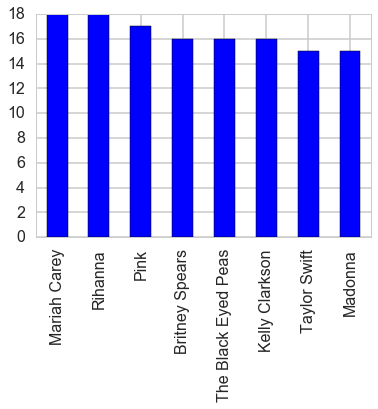

In [11]:
#highest quality singers
#df[df.band_singer.isin(df.band_singer.value_counts().index)]
t = df.band_singer.value_counts()[df.band_singer.value_counts()>=15]
t.plot(kind = 'bar')

####  What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking. 

To do this, we will group all of a singers songs together and assign each song a score `101 - ranking`. Order the singers by their total score and make a bar chart for the top 20.

In [12]:
df['score'] = 100 - df['ranking']

In [13]:
df_value = df.groupby(by=['band_singer']).sum().sort_values('score',ascending = False).head(20).reset_index()

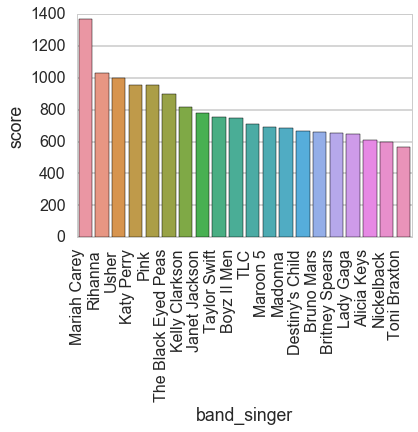

In [14]:
#df_value
ax = sns.barplot(x='band_singer',y='score',data = df_value)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

####  Do you notice any major differences when you change the metric?

How have the singers at the top shifted places? Why do you think this happens?

## Scraping and Constructing: Information about Artists, Bands and Genres from Wikipedia

Our next job is to use those band/singer urls we collected under `flatframe.url` and get information about singers and/or bands.

### Scrape information about artists from wikipedia

We wish to fetch information about the singers or groups for all the winning songs in a list of years.

Here we show a function that fetches information about a singer or group from their url on wikipedia. create a cache object `urlcache` that will avoid redundant HTTP requests (e.g. an artist might have multiple singles on a single year, or be on the list over a span of years). Once we have fetched information about an artist, we don't need to do it again. The caching also helps if the network goes down, or the target website is having some problems.

If the request gets an HTTP return code different from 200, (such as a 404 not found or 500 Internal Server Error) the cells for that URL will have a value of 1; and if the request completely fails (e.g. no network connection) the cell will have a value of 2. This will allow you to analyse the failed requests.


In [15]:
urlcache={}


In [123]:
def get_page(url):
    # Check if URL has already been visited.
    if (url not in urlcache) or (urlcache[url]==1) or (urlcache[url]==2):
        time.sleep(1)
        # try/except blocks are used whenever the code could generate an exception (e.g. division by zero).
        # In this case we don't know if the page really exists, or even if it does, if we'll be able to reach it.
        try:
            r = requests.get("http://en.wikipedia.org%s" % url)

            if r.status_code == 200:
                urlcache[url] = r.text
            else:
                urlcache[url] = 1
        except:
            urlcache[url] = 2
    return urlcache[url]


In [16]:
flatframe = df

We sort the `flatframe` by year, ascending, first. Think why.

In [17]:
flatframe=flatframe.sort_values('Year')
flatframe.head()

,Year,band_singer,ranking,song,songurl,url,score
0,1992,Boyz II Men,1,End of the Road,[/wiki/End_of_the_Road],[/wiki/Boyz_II_Men],99
1955,1992,The KLF,86,Justified and Ancient,[/wiki/Justified_and_Ancient],[/wiki/The_KLF],14
1150,1992,P.M. Dawn,51,I'd Die Without You,[/wiki/I%27d_Die_Without_You],[/wiki/P.M._Dawn],49
184,1992,Color Me Badd,9,All 4 Love,[/wiki/All_4_Love],[/wiki/Color_Me_Badd],91
598,1992,Atlantic Starr,27,Masterpiece,[/wiki/Masterpiece_(Atlantic_Starr_song)],[/wiki/Atlantic_Starr],73


In [18]:
flatframe['url'] = flatframe['url'].apply(lambda x: x[0]if len(x)>0 else np.nan)

In [19]:
flatframe

,Year,band_singer,ranking,song,songurl,url,score
0,1992,Boyz II Men,1,End of the Road,[/wiki/End_of_the_Road],/wiki/Boyz_II_Men,99
1955,1992,The KLF,86,Justified and Ancient,[/wiki/Justified_and_Ancient],/wiki/The_KLF,14
1150,1992,P.M. Dawn,51,I'd Die Without You,[/wiki/I%27d_Die_Without_You],/wiki/P.M._Dawn,49
184,1992,Color Me Badd,9,All 4 Love,[/wiki/All_4_Love],/wiki/Color_Me_Badd,91
598,1992,Atlantic Starr,27,Masterpiece,[/wiki/Masterpiece_(Atlantic_Starr_song)],/wiki/Atlantic_Starr,73
874,1992,Queen,39,Bohemian Rhapsody,[/wiki/Bohemian_Rhapsody],/wiki/Queen_(band),61
1173,1992,Amy Grant,52,Good for Me,[/wiki/Good_for_Me_(song)],/wiki/Amy_Grant,48
2162,1992,Mr. Big,95,"""Just Take My Heart""",[nan],/wiki/Mr._Big_(band),5
1679,1992,Bryan Adams,74,Thought I'd Died and Gone to Heaven,[/wiki/Thought_I%27d_Died_and_Gone_to_Heaven],/wiki/Bryan_Adams,26
1656,1992,Paula Abdul,73,Blowing Kisses in the Wind,[/wiki/Blowing_Kisses_in_the_Wind],/wiki/Paula_Abdul,27


#### Pulling and saving the data

In [131]:
# Here we are populating the url cache
# subsequent calls to this cell should be very fast, since Python won't
# need to fetch the page from the web server.
# making a request. If you run it again it will be almost instantaneous, save requests that might have failed
flatframe["url"].apply(get_page)

0       <!DOCTYPE html>\n<html class="client-nojs" lan...
1955    <!DOCTYPE html>\n<html class="client-nojs" lan...
1150    <!DOCTYPE html>\n<html class="client-nojs" lan...
184     <!DOCTYPE html>\n<html class="client-nojs" lan...
598     <!DOCTYPE html>\n<html class="client-nojs" lan...
874     <!DOCTYPE html>\n<html class="client-nojs" lan...
1173    <!DOCTYPE html>\n<html class="client-nojs" lan...
2162    <!DOCTYPE html>\n<html class="client-nojs" lan...
1679    <!DOCTYPE html>\n<html class="client-nojs" lan...
1656    <!DOCTYPE html>\n<html class="client-nojs" lan...
483     <!DOCTYPE html>\n<html class="client-nojs" lan...
2277    <!DOCTYPE html>\n<html class="client-nojs" lan...
851     <!DOCTYPE html>\n<html class="client-nojs" lan...
2024    <!DOCTYPE html>\n<html class="client-nojs" lan...
1196    <!DOCTYPE html>\n<html class="client-nojs" lan...
1633    <!DOCTYPE html>\n<html class="client-nojs" lan...
230     <!DOCTYPE html>\n<html class="client-nojs" lan...
207     <!DOCT

In [132]:
print("Number of bad requests:",np.sum([(urlcache[k]==1) or (urlcache[k]==2) for k in urlcache])) # no one or 0's)
print("Did we get all urls?", len(flatframe.url.unique())==len(urlcache)) # we got all of the urls

('Number of bad requests:', 122)
('Did we get all urls?', True)


Let's save the `urlcache` to disk, just in case we need it again.

In [133]:
with open("artistinfo.json","w") as fd:
    json.dump(urlcache, fd)
del urlcache

In [20]:
with open("artistinfo.json") as json_file:
    urlcache = json.load(json_file)

In [21]:
urlcache.keys()

[u'/wiki/Daughtry_(band)',
 u'/wiki/Total_(group)',
 u'/wiki/Miley_Cyrus',
 u'/wiki/Fantasia_Barrino',
 u'/wiki/Billy_Currington',
 u'/wiki/Gina_G',
 u'/wiki/Stevie_B',
 u'/wiki/En_Vogue',
 u'/wiki/Warren_G',
 u'/wiki/Joan_Osborne',
 u'/wiki/Tove_Lo',
 u'/wiki/The_Veronicas',
 u'/wiki/Jim_Jones_(rapper)',
 u'/wiki/Ne-Yo',
 u'/wiki/The_Cover_Girls',
 u'/wiki/Mark_Wills',
 u'/wiki/Britney_Spears',
 u'/wiki/Charles_%26_Eddie',
 u'/wiki/Kanye_West',
 u'/wiki/Crucial_Conflict',
 u'/wiki/Field_Mob',
 u'/wiki/The_Pretenders',
 u'/wiki/Eric_Ben%C3%A9t',
 u'/wiki/Fastball_(band)',
 u'/wiki/Adele',
 u'/wiki/Alanis_Morissette',
 u'/wiki/IMx',
 u'/wiki/Kylie_Minogue',
 u'/wiki/Shawn_Mullins',
 u'/wiki/702_(band)',
 u'/wiki/Clean_Bandit',
 u'/wiki/Bonnie_Raitt',
 u'/wiki/LeAnn_Rimes',
 u'/wiki/Three_6_Mafia',
 u'/wiki/Crash_Test_Dummies',
 u'/wiki/98_Degrees',
 u'/wiki/Finger_Eleven',
 u'/wiki/Dido_(singer)',
 u'/wiki/Donell_Jones',
 u'/wiki/Bruce_Springsteen',
 u'/wiki/Rich_Gang',
 u'/wiki/Deep_Bl

In [44]:
import re
url_final_list = []
for url_band in urlcache.keys():
    url_new = {}
    url_new['url'] = url_band
    if (urlcache[url_band] != 1) and (urlcache[url_band] != 2):
        soup4 = BeautifulSoup(urlcache[url_band], 'html.parser')
        if soup4.find(attrs = {"class":"bday"}) != None:
            url_new['Born_year'] = soup4.find(attrs = {"class":"bday"}).text
            url_new['Born'] = True
        elif soup4.find(text = re.compile('Years active')) != None:
            url_new['Band_year'] = soup4.find(text = re.compile('Years active')).next_element.next_element.text
            url_new['ya'] = True
    print url_band
    url_final_list.append(url_new)
            
        
#soup2 = BeautifulSoup(urlcache[u'/wiki/Total_(group)'], 'html.parser')
#soup2.find(text = re.compile('Years active')).next_element.next_element.text

/wiki/Daughtry_(band)
/wiki/Total_(group)
/wiki/Miley_Cyrus
/wiki/Fantasia_Barrino
/wiki/Billy_Currington
/wiki/Gina_G
/wiki/Stevie_B
/wiki/En_Vogue
/wiki/Warren_G
/wiki/Joan_Osborne
/wiki/Tove_Lo
/wiki/The_Veronicas
/wiki/Jim_Jones_(rapper)
/wiki/Ne-Yo
/wiki/The_Cover_Girls
/wiki/Mark_Wills
/wiki/Britney_Spears
/wiki/Charles_%26_Eddie
/wiki/Kanye_West
/wiki/Crucial_Conflict
/wiki/Field_Mob
/wiki/The_Pretenders
/wiki/Eric_Ben%C3%A9t
/wiki/Fastball_(band)
/wiki/Adele
/wiki/Alanis_Morissette
/wiki/IMx
/wiki/Kylie_Minogue
/wiki/Shawn_Mullins
/wiki/702_(band)
/wiki/Clean_Bandit
/wiki/Bonnie_Raitt
/wiki/LeAnn_Rimes
/wiki/Three_6_Mafia
/wiki/Crash_Test_Dummies
/wiki/98_Degrees
/wiki/Finger_Eleven
/wiki/Dido_(singer)
/wiki/Donell_Jones
/wiki/Bruce_Springsteen
/wiki/Rich_Gang
/wiki/Deep_Blue_Something
/wiki/Kardinal_Offishall
/wiki/Tweet_(singer)
/wiki/Ricky_Martin
/wiki/Tina_Turner
/wiki/Next_(band)
/wiki/La_Roux
/wiki/Better_Than_Ezra
/wiki/Foster_the_People
/wiki/Mr._President_(band)
/wiki/

In [45]:
url_final_list

[{'Band_year': u'2006\u2013present',
  'url': u'/wiki/Daughtry_(band)',
  'ya': True},
 {'Band_year': u'1994\u20132000, 2014\u2013present',
  'url': u'/wiki/Total_(group)',
  'ya': True},
 {'Born': True, 'Born_year': u'1992-11-23', 'url': u'/wiki/Miley_Cyrus'},
 {'url': u'/wiki/Fantasia_Barrino'},
 {'Born': True, 'Born_year': u'1973-11-19', 'url': u'/wiki/Billy_Currington'},
 {'Born': True, 'Born_year': u'1970-08-03', 'url': u'/wiki/Gina_G'},
 {'url': u'/wiki/Stevie_B'},
 {'Band_year': u'1989\u2013present', 'url': u'/wiki/En_Vogue', 'ya': True},
 {'Born': True, 'Born_year': u'1970-11-10', 'url': u'/wiki/Warren_G'},
 {'Born': True, 'Born_year': u'1962-07-08', 'url': u'/wiki/Joan_Osborne'},
 {'Born': True, 'Born_year': u'1987-10-29', 'url': u'/wiki/Tove_Lo'},
 {'Band_year': u'2004\u2013present',
  'url': u'/wiki/The_Veronicas',
  'ya': True},
 {'Born': True,
  'Born_year': u'1976-07-15',
  'url': u'/wiki/Jim_Jones_(rapper)'},
 {'Born': True, 'Born_year': u'1979-10-18', 'url': u'/wiki/Ne-

In [46]:
df_singer_details = pd.DataFrame(url_final_list)
df_singer_details.head()

,Band_year,Born,Born_year,url,ya
0,2006–present,NaN,NaN,/wiki/Daughtry_(band),True
1,"1994–2000, 2014–present",NaN,NaN,/wiki/Total_(group),True
2,NaN,True,1992-11-23,/wiki/Miley_Cyrus,NaN
3,NaN,NaN,NaN,/wiki/Fantasia_Barrino,NaN
4,NaN,True,1973-11-19,/wiki/Billy_Currington,NaN


In [49]:
df_singer_details = df_singer_details.fillna(value=False)
df_singer_details.head()

,Band_year,Born,Born_year,url,ya
0,2006–present,False,False,/wiki/Daughtry_(band),True
1,"1994–2000, 2014–present",False,False,/wiki/Total_(group),True
2,False,True,1992-11-23,/wiki/Miley_Cyrus,False
3,False,False,False,/wiki/Fantasia_Barrino,False
4,False,True,1973-11-19,/wiki/Billy_Currington,False


#### Extract information about singers and bands

From each page we collected about a singer or a band, extract the following information:

1. If the page has the text "Born" in the sidebar on the right, extract the element with the class `.bday`. If the page doesn't contain "Born", store `False`.  Store either of these into the variable `born`. We want to analyze the artist's age.

2. If the text "Years active" is found, but no "born", assume a band. Store into the variable `ya` the value of the next table cell corresponding to this, or `False` if the text is not found.





####  Merging this information in

In [89]:
TopSong = pd.merge(flatframe,df_singer_details,how='left',left_on = 'url',right_on = 'url')

In [92]:
def get_year(x):
    if x != False:
        try:
            x = x.encode("ascii",'ignore')
        except:
            x = str(x).encode("ascii",'ignore')
    else: 
        x = ''
    try:
        y = re.findall('\d{3,4}',x)[0]
    except:
        y = False
    return y 
TopSong['Band_year'] = TopSong['Band_year'].apply(get_year)
TopSong['Born_year'] = TopSong['Born_year'].apply(get_year)

In [93]:
TopSong

,Year,band_singer,ranking,song,songurl,url,score,Band_year,Born,Born_year,ya
0,1992,Boyz II Men,1,End of the Road,[/wiki/End_of_the_Road],/wiki/Boyz_II_Men,99,1985,False,False,True
1,1992,The KLF,86,Justified and Ancient,[/wiki/Justified_and_Ancient],/wiki/The_KLF,14,1987,False,False,True
2,1992,P.M. Dawn,51,I'd Die Without You,[/wiki/I%27d_Die_Without_You],/wiki/P.M._Dawn,49,1988,False,False,True
3,1992,Color Me Badd,9,All 4 Love,[/wiki/All_4_Love],/wiki/Color_Me_Badd,91,False,True,1985,False
4,1992,Atlantic Starr,27,Masterpiece,[/wiki/Masterpiece_(Atlantic_Starr_song)],/wiki/Atlantic_Starr,73,1976,False,False,True
5,1992,Queen,39,Bohemian Rhapsody,[/wiki/Bohemian_Rhapsody],/wiki/Queen_(band),61,1970,False,False,True
6,1992,Amy Grant,52,Good for Me,[/wiki/Good_for_Me_(song)],/wiki/Amy_Grant,48,False,True,1960,False
7,1992,Mr. Big,95,"""Just Take My Heart""",[nan],/wiki/Mr._Big_(band),5,1988,False,False,True
8,1992,Bryan Adams,74,Thought I'd Died and Gone to Heaven,[/wiki/Thought_I%27d_Died_and_Gone_to_Heaven],/wiki/Bryan_Adams,26,False,True,1959,False
9,1992,Paula Abdul,73,Blowing Kisses in the Wind,[/wiki/Blowing_Kisses_in_the_Wind],/wiki/Paula_Abdul,27,False,True,1962,False


In [76]:
#soup2 = BeautifulSoup(urlcache[u'/wiki/Total_(group)'], 'html.parser')
#z = soup2.find(text = re.compile('Years active')).next_element.next_element.text
#re.compile('\d{3,4}',u'\u2013')
#u'\u2013'.encode("ascii",'ignore')

[u'\u2013']

####  What is the age at which singers achieve their top ranking?

In [95]:
df_singers = TopSong[TopSong['Born'] == True].sort_values(by = ['ranking','Year'])
df_singers.head()

,Year,band_singer,ranking,song,songurl,url,score,Band_year,Born,Born_year,ya
182,1993,Whitney Houston,1,I Will Always Love You,[/wiki/I_Will_Always_Love_You#Whitney_Houston_...,/wiki/Whitney_Houston,99,False,True,1963,False
301,1995,Coolio/L.V.,1,Gangsta's Paradise,[/wiki/Gangsta%27s_Paradise],/wiki/Coolio,99,False,True,1963,False
580,1997,Elton John,1,Something About the Way You Look Tonight/Candl...,[/wiki/Something_About_the_Way_You_Look_Tonigh...,/wiki/Elton_John,99,False,True,1947,False
746,1999,Cher,1,Believe,[/wiki/Believe_(Cher_song)],/wiki/Cher,99,False,True,1946,False
867,2000,Faith Hill,1,Breathe,[/wiki/Breathe_(Faith_Hill_song)],/wiki/Faith_Hill,99,False,True,1967,False


In [101]:
df_singers['Born_year'] = df_singers['Born_year'].astype(int)
df_singers['age_best'] =  df_singers['Year'] - df_singers['Born_year']

In [104]:
df_singers = df_singers[df_singers['ranking'] == 1]

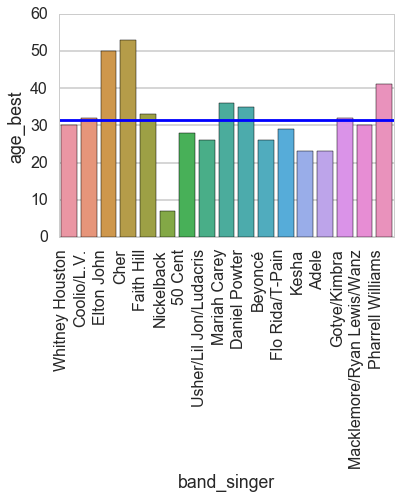

In [110]:
ax = sns.barplot(x='band_singer',y = 'age_best' ,data = df_singers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.axhline(y=df_singers['age_best'].mean())
plt.show()

####  At what year since inception do bands reach their top rankings?

In [111]:
df_band = TopSong[TopSong['ya'] == True].sort_values(by = ['ranking','Year'])
df_band.head()

,Year,band_singer,ranking,song,songurl,url,score,Band_year,Born,Born_year,ya
0,1992,Boyz II Men,1,End of the Road,[/wiki/End_of_the_Road],/wiki/Boyz_II_Men,99,1985,False,False,True
200,1994,Ace of Base,1,The Sign,[/wiki/The_Sign_(song)],/wiki/Ace_of_Base,99,1990,False,False,True
447,1996,Los del Río,1,Macarena,[/wiki/Macarena_(song)],/wiki/Los_del_R%C3%ADo,99,1962,False,False,True
646,1998,Next,1,Too Close,[/wiki/Too_Close_(Next_song)],/wiki/Next_(group),99,1994,False,False,True
911,2001,Lifehouse,1,Hanging by a Moment,[/wiki/Hanging_by_a_Moment],/wiki/Lifehouse_(band),99,1996,False,False,True


In [112]:
df_band['Band_year'] = df_band['Band_year'].astype(int)
df_band['age_best'] =  df_band['Year'] - df_band['Band_year']

In [113]:
df_band = df_band[df_band['ranking'] == 1]

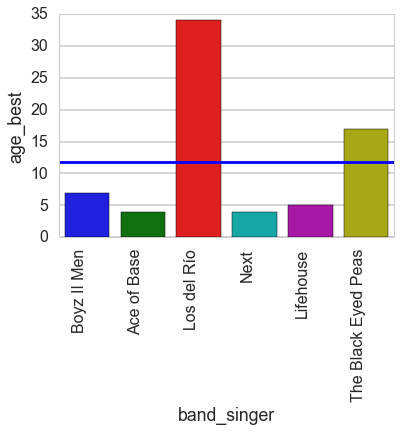

In [114]:
ax = sns.barplot(x='band_singer',y = 'age_best' ,data = df_band)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.axhline(y=df_band['age_best'].mean())
plt.show()